## House Prices: Advanced Regression Techniques
*Predict sales prices and practice feature engineering, RFs, and gradient boosting*

[![https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Image/Hose.jpg](https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Image/Hose.jpg "https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Image/Hose.jpg")](https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Image/Hose.jpg "https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Image/Hose.jpg")

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home

3. [Data loading and description](#section1)<br>
4. [Data preprocessing](#section2)<br>
5. [Preparing Test and Train Data data](#section3)<br>
6. [Modelling and Prediction](#section4)<br>
7. [Conclusions](#section5)

### Load Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
#import category_encoders as ce
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

<a id=section1></a>
## Data Loading and description

##### Lets Import the house price data

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Data/HousePrice_train.csv")
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)


So this data set have 1460 sample set and 81 variable, since here is problem statement is predicting the house price.
So last column SalePrice would be our Target variabe for prediction and rest of all 80 columns is Factor variable

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

The Trget variable in Continious, regression. And the other factor varibles are different types. Tose are Object, Int or float. Lets look into the data quiality. How many are containing null values

In [5]:
data.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

Few variable is having lot og null values. Alley. PoolQC,Fence,MiscFeature coulmns are huge null values and almost full data
set is null for those columns. Lets drop those.

<a id=section2></a>
## Data preprocessing

##### Dropping Alley. PoolQC,Fence,MiscFeature

In [6]:
data = data.drop(['Alley','PoolQC','Fence','MiscFeature'], axis =1)

Lets seperate out the object and int attribute coulns in two different data frame for preprocessing

In [7]:
data_object = data.select_dtypes(include=[object]).copy()
data_linear = data.select_dtypes(exclude=[object]).copy()

In [8]:
data_object.head(2)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,TA,Typ,TA,Attchd,RFn,TA,TA,Y,WD,Normal


In [9]:
data_linear.head(2)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500


Fix the NAN for the object type column

In [10]:
data_object.isnull().sum()

MSZoning           0
Street             0
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
KitchenQual        0
Functional         0
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
PavedDrive         0
SaleType           0
SaleCondition      0
dtype: int64

Those below column needs fixing. Lets look into BsmtQual

- BsmtQual          37
- BsmtCond          37
- BsmtExposure      38
- BsmtFinType1      37
- BsmtFinType2      38
- FireplaceQu      690
- GarageType        81
- GarageFinish      81
- GarageQual        81
- GarageCond        81

There are many ways in how to handle NaN values. In this case we just are goint to use the top category in each feature. So we will break down the first two features BsmtQual and BsmtCond and then apply the same for the rest of features. So let's start with the BsmtQual feature

## Plotting frequency distrubution of variable BsmtCond

<function matplotlib.pyplot.show(*args, **kw)>

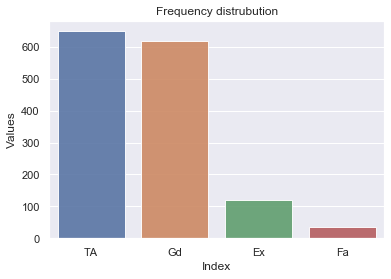

In [11]:
BsmtCond_count = data_object["BsmtQual"].value_counts()
sb.set(style="darkgrid")
sb.barplot(BsmtCond_count.index, BsmtCond_count.values,alpha=0.9)
plt.title("Frequency distrubution")
plt.xlabel("Index", fontsize=12)
plt.ylabel("Values",fontsize=12)
plt.show

So TA is apearing at Index(0), which is maximun number of occurance. That is mode value. So we can fill the NAN values 
with index(0) or Mode 

In [12]:
data_object['BsmtQual'] = data_object['BsmtQual'].fillna(data_object['BsmtQual'].value_counts().index[0])

lets do this for next elements - BsmtCond

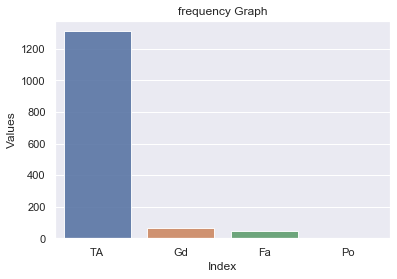

In [13]:
BsmtCond_count = data_object['BsmtCond'].value_counts()
sb.set(style=  'darkgrid')
sb.barplot(BsmtCond_count.index,BsmtCond_count.values,alpha = 0.9)
plt.title("frequency Graph")
plt.xlabel("Index")
plt.ylabel("Values")
plt.show()

Here again the maximun occurance in TA and apprearing at Index(0), mode value. Lets fill the na with index(0) value

In [14]:
data_object['BsmtCond'] = data_object['BsmtCond'].fillna(data_object['BsmtCond'].value_counts().index[0])

Lets do the same for all other object type 

In [15]:
data_object['BsmtExposure'] = data_object['BsmtExposure'].fillna(data_object['BsmtExposure'].value_counts().index[0])
data_object['BsmtFinType1'] = data_object['BsmtFinType1'].fillna(data_object['BsmtFinType1'].value_counts().index[0])
data_object['BsmtFinType2'] = data_object['BsmtFinType2'].fillna(data_object['BsmtFinType2'].value_counts().index[0])
data_object['GarageType'] = data_object['GarageType'].fillna(data_object['GarageType'].value_counts().index[0])
data_object['GarageFinish'] = data_object['GarageFinish'].fillna(data_object['GarageFinish'].value_counts().index[0])
data_object['GarageQual'] = data_object['GarageQual'].fillna(data_object['GarageQual'].value_counts().index[0])
data_object['FireplaceQu'] = data_object['FireplaceQu'].fillna(data_object['FireplaceQu'].value_counts().index[0])
data_object['GarageCond'] = data_object['GarageCond'].fillna(data_object['GarageCond'].value_counts().index[0])
data_object['Electrical'] = data_object['Electrical'].fillna(data_object['Electrical'].value_counts().index[0])


Now lets have a final look into data_object- NAN sum value

In [16]:
data_object.isnull().sum()

MSZoning         0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
SaleType         0
SaleCondition    0
dtype: int64

All NAN values fixed for data_objects. Now lets fix the data_linear na column

In [17]:
data_linear.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

LotFrontage      and GarageYrBlt    have some null values. Since those are numeric, we could fill those values with their
mean values

In [18]:
data_linear['LotFrontage'] = data_linear['LotFrontage'].fillna(data_linear['LotFrontage'].value_counts().mean())
data_linear['GarageYrBlt'] = data_linear['GarageYrBlt'].fillna(data_linear['GarageYrBlt'].value_counts().mean())
data_linear['MasVnrArea'] = data_linear['MasVnrArea'].fillna(data_linear['MasVnrArea'].value_counts().mean())


Lets have check for null values into data_linear

In [19]:
data_linear.isnull().sum()

Id               0
MSSubClass       0
LotFrontage      0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
TotRmsAbvGrd     0
Fireplaces       0
GarageYrBlt      0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

In [20]:
data_linear = data_linear.drop('Id',axis = 1)

<a id=section3></a>
## Preparing Test and Train Data data

In [21]:
data_linear.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Lets take out the target variable sales price in different column.

In [22]:
Y_train =data_linear["SalePrice"]

In [23]:
Y_train.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [24]:
data_linear_new = data_linear.drop('SalePrice', axis =1)

In [25]:
data_linear_new.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008


Now lets solve the proble with categorical feature. all data_object column is categorical. lets encode those to number

In [26]:
data_object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
!pip install sklearn
from sklearn import preprocessing
from sklearn.preprocessing import CategoricalEncoder as ce

ImportError: cannot import name 'CategoricalEncoder' from 'sklearn.preprocessing' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\__init__.py)

In [28]:
 import category_encoders as ce

In [29]:
conda install -c conda-forge category_encoders

^C

Note: you may need to restart the kernel to use updated packages.


In [30]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [33]:
import category_encoders as ce

In [34]:
encoder = ce.BackwardDifferenceEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])

In [35]:
data_object_BackDiff = encoder.fit_transform(data_object)

In [36]:
data_object_BackDiff.head()

,intercept,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,Street_0,LotShape_0,LotShape_1,LotShape_2,LandContour_0,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1,-0.8,-0.6,-0.4,-0.2,-0.5,-0.75,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,0.166667,-0.666667,-0.5,-0.333333,-0.166667
4,1,-0.8,-0.6,-0.4,-0.2,-0.5,0.25,-0.5,-0.25,-0.75,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [37]:
data_corpus = pd.concat([data_linear_new,data_object_BackDiff],axis =1)

In [38]:
data_corpus.head(3)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


Now lets scale the data_corpus. We will use min Max scaler now.

In [39]:
min_max_scaler = preprocessing.MinMaxScaler()

In [40]:
data_corpus.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_3', 'SaleType_4', 'SaleType_5', 'SaleType_6', 'SaleType_7',
       'SaleCondition_0', 'SaleCondition_1', 'SaleCondition_2',
       'SaleCondition_3', 'SaleCondition_4'],
      dtype='object', length=238)

In [41]:
X_train = pd.DataFrame(min_max_scaler.fit_transform(data_corpus),columns = data_corpus.columns)

In [42]:
X_train.head(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,0.235294,0.179030,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.228686,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.235294,0.188961,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.294118,0.162479,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.235294,0.241927,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Now lets preprocess the test data as same way , we did for train data

##### Load Data

In [43]:
test_data = pd.read_csv("https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Data/HousePrice_test.csv")
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [44]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
Id               1459 non-null int64
MSSubClass       1459 non-null int64
MSZoning         1455 non-null object
LotFrontage      1232 non-null float64
LotArea          1459 non-null int64
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
OverallQual      1459 non-null int64
OverallCond      1459 non-null int64
YearBuilt        1459 non-null int64
YearRemodAdd     1459 non-null int64
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-

Lets split the test data set with object and non object set.

In [45]:
test_data_Object = test_data.select_dtypes(include=['object']).copy()
test_data_linear = test_data.select_dtypes(exclude=['object']).copy()

In [46]:
test_data_Object.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 43 columns):
MSZoning         1455 non-null object
Street           1459 non-null object
Alley            107 non-null object
LotShape         1459 non-null object
LandContour      1459 non-null object
Utilities        1457 non-null object
LotConfig        1459 non-null object
LandSlope        1459 non-null object
Neighborhood     1459 non-null object
Condition1       1459 non-null object
Condition2       1459 non-null object
BldgType         1459 non-null object
HouseStyle       1459 non-null object
RoofStyle        1459 non-null object
RoofMatl         1459 non-null object
Exterior1st      1458 non-null object
Exterior2nd      1458 non-null object
MasVnrType       1443 non-null object
ExterQual        1459 non-null object
ExterCond        1459 non-null object
Foundation       1459 non-null object
BsmtQual         1415 non-null object
BsmtCond         1414 non-null object
BsmtExposure     141

In [47]:
test_data_Object.isnull().sum()

MSZoning            4
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond           45
BsmtExposure       44
BsmtFinType1       42
BsmtFinType2       42
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
KitchenQual         1
Functional          2
FireplaceQu       730
GarageType         76
GarageFinish       78
GarageQual         78
GarageCond         78
PavedDrive          0
PoolQC           1456
Fence            1169
MiscFeature      1408
SaleType            1
SaleCondition       0
dtype: int64

In [48]:
test_data_Object=test_data_Object.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1)

In [49]:
test_data_Object['MasVnrType'] = test_data_Object['MasVnrType'].fillna(test_data_Object['MasVnrType'].value_counts().index[0])
test_data_Object['BsmtQual'] = test_data_Object['BsmtQual'].fillna(test_data_Object['BsmtQual'].value_counts().index[0])
test_data_Object['BsmtCond'] = test_data_Object['BsmtCond'].fillna(test_data_Object['BsmtCond'].value_counts().index[0])
test_data_Object['BsmtExposure'] = test_data_Object['BsmtExposure'].fillna(test_data_Object['BsmtExposure'].value_counts().index[0])
test_data_Object['FireplaceQu'] = test_data_Object['FireplaceQu'].fillna(test_data_Object['FireplaceQu'].value_counts().index[0])
test_data_Object['GarageType'] = test_data_Object['GarageType'].fillna(test_data_Object['GarageType'].value_counts().index[0])
test_data_Object['BsmtFinType2'] = test_data_Object['BsmtFinType2'].fillna(test_data_Object['BsmtFinType2'].value_counts().index[0])
test_data_Object['BsmtFinType1'] = test_data_Object['BsmtFinType1'].fillna(test_data_Object['BsmtFinType1'].value_counts().index[0])
test_data_Object['GarageFinish'] = test_data_Object['GarageFinish'].fillna(test_data_Object['GarageFinish'].value_counts().index[0])
test_data_Object['GarageQual'] = test_data_Object['GarageQual'].fillna(test_data_Object['GarageQual'].value_counts().index[0])
test_data_Object['GarageCond'] = test_data_Object['GarageCond'].fillna(test_data_Object['GarageCond'].value_counts().index[0])

Lets process the null variable for test data non object type. We will replace the  null values with mean

In [50]:
test_data_linear.isnull().sum()

Id                 0
MSSubClass         0
LotFrontage      227
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        15
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath       2
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       78
GarageCars         1
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
dtype: int64

In [51]:
test_data_linear['LotFrontage'] = test_data_linear['LotFrontage'].fillna(test_data_linear['LotFrontage'].value_counts().mean())
test_data_linear['MasVnrArea'] = test_data_linear['MasVnrArea'].fillna(test_data_linear['MasVnrArea'].value_counts().mean())
test_data_linear['GarageYrBlt'] = test_data_linear['GarageYrBlt'].fillna(test_data_linear['GarageYrBlt'].value_counts().mean())
test_data_linear['BsmtFinSF1'] = test_data_linear['BsmtFinSF1'].fillna(test_data_linear['BsmtFinSF1'].value_counts().mean())
test_data_linear['BsmtFinSF2'] = test_data_linear['BsmtFinSF2'].fillna(test_data_linear['BsmtFinSF2'].value_counts().mean())
test_data_linear['BsmtUnfSF'] = test_data_linear['BsmtUnfSF'].fillna(test_data_linear['BsmtUnfSF'].value_counts().mean())
test_data_linear['TotalBsmtSF'] = test_data_linear['TotalBsmtSF'].fillna(test_data_linear['TotalBsmtSF'].value_counts().mean())
test_data_linear['BsmtFullBath'] = test_data_linear['BsmtFullBath'].fillna(test_data_linear['BsmtFullBath'].value_counts().mean())
test_data_linear['BsmtHalfBath'] = test_data_linear['BsmtHalfBath'].fillna(test_data_linear['BsmtHalfBath'].value_counts().mean())
test_data_linear['GarageCars'] = test_data_linear['GarageCars'].fillna(test_data_linear['GarageCars'].value_counts().mean())
test_data_linear['GarageArea'] = test_data_linear['GarageArea'].fillna(test_data_linear['GarageArea'].value_counts().mean())


Lets fix the categorical problem of test data set

In [52]:
test_data_Object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [53]:
encoder_test = ce.BackwardDifferenceEncoder(cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])

In [54]:
test_data_Object_encoded = encoder_test.fit_transform(test_data_Object)


In [55]:
test_data_Object_encoded.head()

,intercept,MSZoning_0,MSZoning_1,MSZoning_2,MSZoning_3,MSZoning_4,Street_0,LotShape_0,LotShape_1,LotShape_2,...,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667,-0.5,-0.75,-0.5,-0.25,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1,0.166667,-0.666667,-0.5,-0.333333,-0.166667,-0.5,0.25,-0.5,-0.25,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1,0.166667,-0.666667,-0.5,-0.333333,-0.166667,-0.5,0.25,-0.5,-0.25,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,1,0.166667,-0.666667,-0.5,-0.333333,-0.166667,-0.5,0.25,-0.5,-0.25,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
4,1,0.166667,-0.666667,-0.5,-0.333333,-0.166667,-0.5,0.25,-0.5,-0.25,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [56]:
test_data_linear.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,730.0,140,0,0,0,120,0,0,6,2010
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,312.0,393,36,0,0,0,0,12500,6,2010
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,482.0,212,34,0,0,0,0,0,3,2010
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,470.0,360,36,0,0,0,0,0,6,2010
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,506.0,0,82,0,0,144,0,0,1,2010


In [57]:
test_data_corpus = pd.concat([test_data_linear,test_data_Object_encoded],axis = 1)

In [58]:
test_data_corpus.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleType_8,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,1461,20,80.0,11622,5,6,1961,1961,0.0,468.0,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
1,1462,20,81.0,14267,6,6,1958,1958,108.0,923.0,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
2,1463,60,74.0,13830,5,5,1997,1998,0.0,791.0,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
3,1464,60,78.0,9978,6,6,1998,1998,20.0,602.0,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667
4,1465,120,43.0,5005,8,5,1992,1992,0.0,263.0,...,-0.5,-0.4,-0.3,-0.2,-0.1,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [59]:
X_test = pd.DataFrame(min_max_scaler.fit_transform(test_data_corpus),columns=test_data_corpus.columns)


Now we are ready with data set fo Y_train, X_train,X_test. We will fit Y_train and X_train into model and get prediction for X_Test

<a id=section4></a>
## Modelling and Prediction


In [60]:
clf = SVR(C=0.8, epsilon=0.2, kernel='poly')
regr = RandomForestRegressor(max_depth=3)

In [61]:
clf.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [62]:
YPredicted_test = clf.predict(X_train)

In [63]:
X_train.shape

(1460, 238)

In [64]:
X_test.shape

(1459, 229)

In [65]:
pca = PCA()

In [66]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [67]:
pca.fit(X_test)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
clf.fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [69]:
YPredicted_train = clf.predict(X_train)

In [70]:
from sklearn import metrics

In [71]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train, YPredicted_train))

In [72]:
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 81412.15513632016


In [73]:
regr.fit(X_train, Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=3,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [74]:
YPredict_train = regr.predict(X_train)

In [75]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Y_train, YPredict_train))

In [76]:
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 36855.47848769741


### Conclusion
SO from both the model, we found SVM is better fit than the Random Forest one

Now lest predict the target variavle of the test set

In [77]:
Ypredict_test1 = clf.predict(X_test)

ValueError: X.shape[1] = 229 should be equal to 238, the number of features at training time

But there is a problem. After data processing, both set got difference shape. Trainng data set have 238 columns. Test data set have 238 columns. So we need to have both set same shape.

Lets try another approach. Will concat the test and train data set first. Will add some column identifier to recognize test and train data set. Then Pre Process that data for linear and objective variable. And again split those,filter on column identifier


In [78]:
data_train_raw = pd.read_csv("https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Data/HousePrice_train.csv")
data_train_raw.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [79]:
data_train_raw_price = data_train_raw.SalePrice

In [80]:
data_train_raw_price.head(2)

0    208500
1    181500
Name: SalePrice, dtype: int64

In [81]:
data_train_raw_noPrice = data_train_raw.drop('SalePrice', axis =1)

In [82]:
data_train_raw_noPrice.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal


In [83]:
data_train_raw_noPrice['trainset'] = 1

In [84]:
data_train_raw_noPrice.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,trainset
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1


In [85]:
data_test_raw = pd.read_csv("https://raw.githubusercontent.com/rabindragoswami/DataScience/master/Data/HousePrice_test.csv")
test_data.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


In [86]:
data_test_raw['trainset'] = 0
data_test_raw.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,trainset
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,0


In [87]:
data_train_test = pd.concat([data_train_raw_noPrice,data_test_raw],axis = 0)

In [88]:
data_train_test.shape

(2919, 81)

In [89]:
data_train_test_noId = data_train_test.drop('Id',axis = 1)

In [90]:
data_train_test_noId.head(1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,trainset
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,1


In [91]:
data_train_test_noId.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu      1420
GarageType        157
GarageYrBlt       159
GarageFinish      159
GarageCars          1
GarageArea          1
GarageQual        159
GarageCond        159
PavedDrive

In [92]:
data_train_test_noId=data_train_test_noId.drop(['Alley','PoolQC','Fence','MiscFeature'], axis = 1)

In [93]:
data_train_test_noId['BsmtQual'] = data_train_test_noId['BsmtQual'].fillna(data_train_test_noId['BsmtQual'].value_counts().index[0])
data_train_test_noId['BsmtCond'] = data_train_test_noId['BsmtCond'].fillna(data_train_test_noId['BsmtCond'].value_counts().index[0])
data_train_test_noId['BsmtExposure'] = data_train_test_noId['BsmtExposure'].fillna(data_train_test_noId['BsmtExposure'].value_counts().index[0])
data_train_test_noId['BsmtFinType1'] = data_train_test_noId['BsmtFinType1'].fillna(data_train_test_noId['BsmtFinType1'].value_counts().index[0])
data_train_test_noId['BsmtFinType2'] = data_train_test_noId['BsmtFinType2'].fillna(data_train_test_noId['BsmtFinType2'].value_counts().index[0])
data_train_test_noId['GarageType'] = data_train_test_noId['GarageType'].fillna(data_train_test_noId['GarageType'].value_counts().index[0])
data_train_test_noId['GarageFinish'] = data_train_test_noId['GarageFinish'].fillna(data_train_test_noId['GarageFinish'].value_counts().index[0])
data_train_test_noId['GarageQual'] = data_train_test_noId['GarageQual'].fillna(data_train_test_noId['GarageQual'].value_counts().index[0])
data_train_test_noId['FireplaceQu'] = data_train_test_noId['FireplaceQu'].fillna(data_train_test_noId['FireplaceQu'].value_counts().index[0])
data_train_test_noId['GarageCond'] = data_train_test_noId['GarageCond'].fillna(data_train_test_noId['GarageCond'].value_counts().index[0])
data_train_test_noId['Electrical'] = data_train_test_noId['Electrical'].fillna(data_train_test_noId['Electrical'].value_counts().index[0])


In [94]:
data_train_test_noId['LotFrontage'] = data_train_test_noId['LotFrontage'].fillna(data_train_test_noId['LotFrontage'].value_counts().mean())
data_train_test_noId['MasVnrArea'] = data_train_test_noId['MasVnrArea'].fillna(data_train_test_noId['MasVnrArea'].value_counts().mean())
data_train_test_noId['GarageYrBlt'] = data_train_test_noId['GarageYrBlt'].fillna(data_train_test_noId['GarageYrBlt'].value_counts().mean())
data_train_test_noId['BsmtFinSF1'] = data_train_test_noId['BsmtFinSF1'].fillna(data_train_test_noId['BsmtFinSF1'].value_counts().mean())
data_train_test_noId['BsmtFinSF2'] = data_train_test_noId['BsmtFinSF2'].fillna(data_train_test_noId['BsmtFinSF2'].value_counts().mean())
data_train_test_noId['BsmtUnfSF'] = data_train_test_noId['BsmtUnfSF'].fillna(data_train_test_noId['BsmtUnfSF'].value_counts().mean())
data_train_test_noId['TotalBsmtSF'] = data_train_test_noId['TotalBsmtSF'].fillna(data_train_test_noId['TotalBsmtSF'].value_counts().mean())
data_train_test_noId['BsmtFullBath'] = data_train_test_noId['BsmtFullBath'].fillna(data_train_test_noId['BsmtFullBath'].value_counts().mean())
data_train_test_noId['BsmtHalfBath'] = data_train_test_noId['BsmtHalfBath'].fillna(data_train_test_noId['BsmtHalfBath'].value_counts().mean())
data_train_test_noId['GarageCars'] = data_train_test_noId['GarageCars'].fillna(data_train_test_noId['GarageCars'].value_counts().mean())
data_train_test_noId['GarageArea'] = data_train_test_noId['GarageArea'].fillna(data_train_test_noId['GarageArea'].value_counts().mean())


In [95]:
data_train_test_noId['MSZoning'] = data_train_test_noId['MSZoning'].fillna(data_train_test_noId['MSZoning'].value_counts().index[0])
data_train_test_noId['Utilities'] = data_train_test_noId['Utilities'].fillna(data_train_test_noId['Utilities'].value_counts().index[0])
data_train_test_noId['Exterior1st'] = data_train_test_noId['Exterior1st'].fillna(data_train_test_noId['Exterior1st'].value_counts().index[0])
data_train_test_noId['Exterior2nd'] = data_train_test_noId['Exterior2nd'].fillna(data_train_test_noId['Exterior2nd'].value_counts().index[0])
data_train_test_noId['KitchenQual'] = data_train_test_noId['KitchenQual'].fillna(data_train_test_noId['KitchenQual'].value_counts().index[0])
data_train_test_noId['MasVnrType'] = data_train_test_noId['MasVnrType'].fillna(data_train_test_noId['MasVnrType'].value_counts().index[0])
data_train_test_noId['Functional'] = data_train_test_noId['Functional'].fillna(data_train_test_noId['Functional'].value_counts().index[0])
data_train_test_noId['SaleType'] = data_train_test_noId['SaleType'].fillna(data_train_test_noId['SaleType'].value_counts().index[0])

In [96]:
data_train_test_noId.isnull().sum()


MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
                ..
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch   

In [97]:
data_train_test_noId_Object = data_train_test_noId.select_dtypes(include=['object']).copy()
data_train_test_noId_linear = data_train_test_noId.select_dtypes(exclude=['object']).copy()

In [98]:
data_train_test_noId_Object.shape

(2919, 39)

In [99]:
data_train_test_noId_linear.shape

(2919, 37)

In [100]:
data_train_test_noId_Object.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [101]:
encoder = ce.BackwardDifferenceEncoder(cols=['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'])


In [102]:
data_object_BackDiff = encoder.fit_transform(data_train_test_noId_Object)


In [103]:
data_object_BackDiff.shape

(2919, 201)

In [104]:
data_corpus_master = pd.concat([data_train_test_noId_linear,data_object_BackDiff],axis=1)

In [105]:
data_corpus_master.shape

(2919, 238)

In [106]:
data_corpus_master.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,-0.555556,-0.444444,-0.333333,-0.222222,-0.111111,-0.833333,-0.666667,-0.5,-0.333333,-0.166667


In [107]:
min_max_scaler = preprocessing.MinMaxScaler()


In [108]:
data_corpus_master_N = pd.DataFrame(min_max_scaler.fit_transform(data_corpus_master),columns = data_corpus_master.columns)

In [109]:
data_corpus_master_trainset1 =data_corpus_master_N[data_corpus_master_N['trainset']==1]

In [110]:
data_corpus_master_trainset1.shape

(1460, 238)

In [111]:
data_corpus_master_testset0 =data_corpus_master_N[data_corpus_master_N['trainset']==0]

In [112]:
data_corpus_master_testset0.shape

(1459, 238)

In [113]:
X_Train = data_corpus_master_trainset1.drop('trainset',axis = 1)
X_Test = data_corpus_master_testset0.drop('trainset',axis = 1)

In [114]:
X_Train.shape

(1460, 237)

In [115]:
X_Test.shape

(1459, 237)

In [116]:
X_Train.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
0,0.235294,0.15644,0.03342,0.666667,0.5,0.949275,0.883333,0.1225,0.125089,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
X_Test.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_3,SaleType_4,SaleType_5,SaleType_6,SaleType_7,SaleCondition_0,SaleCondition_1,SaleCondition_2,SaleCondition_3,SaleCondition_4
1460,0.0,0.207462,0.048246,0.444444,0.625,0.644928,0.183333,0.0,0.08292,0.094364,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
Y_Train = data_train_raw_price

In [119]:
Y_Train.head(2)

0    208500
1    181500
Name: SalePrice, dtype: int64

## Model Fitting

In [120]:
pca = PCA()

In [121]:
pca.fit(X_Train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [122]:
pca.fit(X_Test)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [124]:
clf.fit(X_Train,Y_Train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVR(C=0.8, cache_size=200, coef0=0.0, degree=3, epsilon=0.2,
    gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
YPredicted_Train = clf.predict(X_Train)

In [126]:
RMSE_train = np.sqrt( metrics.mean_squared_error(Y_Train, YPredicted_Train))
print('RMSE for training set is {}'.format(RMSE_train))

RMSE for training set is 81412.15907717454


In [127]:
YPredicted_Test = clf.predict(X_Test)

In [128]:
Ypred = pd.DataFrame({'SalePrice':YPredicted_Test})

In [129]:
prediction = pd.concat([data_test_raw['Id'], Ypred], axis=1)

In [132]:
prediction.head(5)

,Id,SalePrice
0,1461,162999.990811
1,1462,162999.981089
2,1463,163000.257509
3,1464,163000.272249
4,1465,163000.192670


In [ ]:
df.to_csv(r'Path where you want to store the exported CSV file\File Name.csv')

In [136]:
prediction.to_csv(r'houseprice_prediction.csv')

In [137]:
prediction.to_csv(r'C:\Users\rabin.000\Desktop\Python\houseprice_prediction.csv')

<a id=section5></a>
## Conclusions